In [62]:
import torch
from models.cnn_lstm import *
from utils.preprocessing import *
from models.cnn import *
from utils.loops import *
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device('cpu')
print(device)
# device = torch.device('cpu')

def seed_everything(seed: int):
    import os
    import random

    import numpy as np
    import torch
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

mps


In [5]:
train_dataloader, val_dataloader, test_dataloader = load_data(64)

Shape of training set: (14535, 22, 400)
Shape of validation set: (500, 22, 400)
Shape of training labels: (14535,)
Shape of validation labels: (500,)
Shape of training labels after categorical conversion: (1615,)
Shape of validation labels after categorical conversion: (500,)
Shape of test labels after categorical conversion: (443, 4)


In [123]:
seed_everything(0)

# (H - h + 2p) / s + 1
# 3 -> 1, 5 -> 2, 7 -> 3
kernel_size = 7
pad = 3

cnn_lstm_hybrid = cnn_lstm(kernel_size=kernel_size, pad=pad)

weight_decay = 1e-2

lr = 1e-3
optimizer = torch.optim.Adam(params=cnn_lstm_hybrid.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)

# Train the model
history = train(cnn_lstm_hybrid,
      train_dataloader,
      val_dataloader,
      optimizer,
      criterion,
      device,
      num_epochs=50)

Epoch 1/50: 100%|██████████| 228/228 [00:10<00:00, 22.52it/s, accuracy=0.264, loss=0.0534]


Validation set: Average loss = 1.3916, Accuracy = 0.2420


Epoch 2/50: 100%|██████████| 228/228 [00:09<00:00, 24.76it/s, accuracy=0.255, loss=0.0471]


Validation set: Average loss = 1.3864, Accuracy = 0.2580


Epoch 3/50: 100%|██████████| 228/228 [00:09<00:00, 24.60it/s, accuracy=0.253, loss=0.0494]


Validation set: Average loss = 1.3868, Accuracy = 0.2420


Epoch 4/50: 100%|██████████| 228/228 [00:09<00:00, 24.83it/s, accuracy=0.251, loss=0.0514]


Validation set: Average loss = 1.3869, Accuracy = 0.2420


Epoch 5/50: 100%|██████████| 228/228 [00:09<00:00, 24.79it/s, accuracy=0.251, loss=0.0534]


Validation set: Average loss = 1.3859, Accuracy = 0.2580


Epoch 6/50: 100%|██████████| 228/228 [00:09<00:00, 23.51it/s, accuracy=0.252, loss=0.0553]


Validation set: Average loss = 1.3873, Accuracy = 0.2420


Epoch 7/50: 100%|██████████| 228/228 [00:09<00:00, 24.71it/s, accuracy=0.249, loss=0.0571]


Validation set: Average loss = 1.3864, Accuracy = 0.2800


Epoch 8/50: 100%|██████████| 228/228 [00:09<00:00, 25.23it/s, accuracy=0.251, loss=0.0589]


Validation set: Average loss = 1.3908, Accuracy = 0.2280


Epoch 9/50: 100%|██████████| 228/228 [00:09<00:00, 24.77it/s, accuracy=0.245, loss=0.0606]


Validation set: Average loss = 1.3909, Accuracy = 0.2580


Epoch 10/50: 100%|██████████| 228/228 [00:09<00:00, 24.92it/s, accuracy=0.258, loss=0.0622]


Validation set: Average loss = 1.3857, Accuracy = 0.2720


Epoch 11/50: 100%|██████████| 228/228 [00:09<00:00, 24.82it/s, accuracy=0.25, loss=0.0639] 


Validation set: Average loss = 1.3889, Accuracy = 0.2280


Epoch 12/50: 100%|██████████| 228/228 [00:09<00:00, 23.49it/s, accuracy=0.256, loss=0.0654]


Validation set: Average loss = 1.3873, Accuracy = 0.2580


Epoch 13/50: 100%|██████████| 228/228 [00:09<00:00, 23.28it/s, accuracy=0.247, loss=0.0669]


Validation set: Average loss = 1.3912, Accuracy = 0.2280


Epoch 14/50: 100%|██████████| 228/228 [00:09<00:00, 23.45it/s, accuracy=0.251, loss=0.0684]


Validation set: Average loss = 1.3879, Accuracy = 0.2420


Epoch 15/50: 100%|██████████| 228/228 [00:09<00:00, 23.17it/s, accuracy=0.257, loss=0.0699]


Validation set: Average loss = 1.3900, Accuracy = 0.2580


Epoch 16/50:   8%|▊         | 18/228 [00:00<00:09, 22.09it/s, accuracy=0.248, loss=0.0703]


KeyboardInterrupt: 

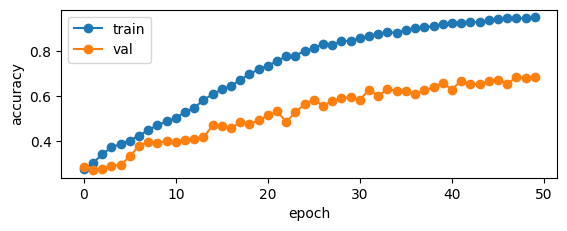

In [101]:
plt.subplot(2, 1, 1)
plt.plot(history['train_accuracy'], '-o')
plt.plot(history['val_accuracy'], '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')

# plt.subplot(2, 1, 2)
# plt.plot(history['train_loss'], '-o')
# plt.plot(history['val_loss'], '-o')
# plt.legend(['train', 'val'], loc='upper left')
# plt.ylabel('loss')
# plt.xlabel('epoch')
plt.show()

In [102]:
avg_loss, accuracy = evaluate(cnn_lstm_hybrid, test_dataloader, criterion, device)
print('Test Accuracy:', accuracy)

Test Accuracy: 0.6636568848758465


In [63]:
seed_everything(0)

# (H - h + 2p) / s + 1
# 3 -> 1, 5 -> 2, 7 -> 3
kernel_size = 11
pad = 5

test_model = CNN(kernel_size=kernel_size, pad=pad)

weight_decay = 1e-2

lr = 1e-3
optimizer = torch.optim.SGD(params=test_model.parameters(), momentum=0.9, lr=lr, weight_decay=weight_decay)
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)

# Train the model
history = train(test_model,
      train_dataloader,
      val_dataloader,
      optimizer,
      criterion,
      device,
      num_epochs=50)

Epoch 1/50:  29%|██▉       | 67/228 [00:02<00:05, 28.40it/s, accuracy=0.261, loss=0.0217]


KeyboardInterrupt: 

Text(0.5, 0, 'epoch')

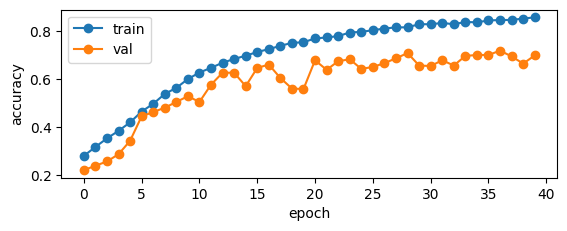

In [141]:
plt.subplot(2, 1, 1)
plt.plot(history['train_accuracy'], '-o')
plt.plot(history['val_accuracy'], '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [142]:
avg_loss, accuracy = evaluate(test_model, test_dataloader, criterion, device)
print('Test Accuracy:', accuracy)

Test Accuracy: 0.6930022573363431


In [139]:
torch.save({
    'model_state_dict': test_model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'train_hist': history,
    'test_accuracy': accuracy,
    'test_loss': avg_loss
}, 'weights/cnn_weights_69.pth')

In [28]:
model_11 = test_lstm(kernel_size=11, pad=5)
checkpoint = torch.load('weights/cnn_weights_69.pth')
model_11.load_state_dict(checkpoint['model_state_dict'])
model_11 = model_11.float().to(device)

In [29]:
avg_loss, accuracy = evaluate(model_11, test_dataloader, criterion, device)
print('Test Accuracy:', accuracy)

Test Accuracy: 0.6952595936794582


In [58]:
cnn = test_lstm(kernel_size=11, pad=5)
checkpoint = torch.load('weights/cnn_weights_69.pth')
cnn.load_state_dict(checkpoint['model_state_dict'])
cnn = cnn.float().to(device)

cnn2 = test_lstm(kernel_size=13, pad=6)
checkpoint = torch.load('weights/cnn_weights_70.pth')
cnn2.load_state_dict(checkpoint['model_state_dict'])
cnn2 = cnn2.float().to(device)

cnn3 = test_lstm(kernel_size=5, pad=2)
checkpoint = torch.load('weights/cnn_weights_68.pth')
cnn3.load_state_dict(checkpoint['model_state_dict'])
cnn3 = cnn3.float().to(device)

models = [cnn, cnn2, cnn3]

In [59]:
accuracy = test(models, test_dataloader, device)
print('Test Accuracy:', accuracy)

Test Accuracy: 0.6862302483069977
